In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sbn
from sklearn import preprocessing
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris,make_circles
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split

In [3]:
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)

x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)

x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary={"x":x,"y":y}

data=pd.DataFrame(dictionary)
data

,x,y
0,28.154902,24.780752
1,22.876986,21.013226
2,27.936188,27.685004
3,22.609519,35.630728
4,24.459324,30.819110
...,...,...
2995,55.550019,10.624460
2996,46.770802,17.873576
2997,47.609515,15.677349
2998,60.759871,19.365368


Text(0.5, 1.0, 'K-ortalama kümeleme yöntemi için oluşturulan veri seti')

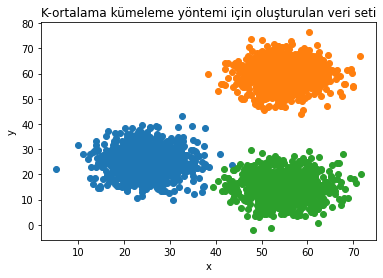

In [4]:
mp.figure()
mp.scatter(x1,y1)
mp.scatter(x2,y2)
mp.scatter(x3,y3)
mp.xlabel("x")
mp.ylabel("y")
mp.title("K-ortalama kümeleme yöntemi için oluşturulan veri seti")

Text(0, 0.5, 'wcss')

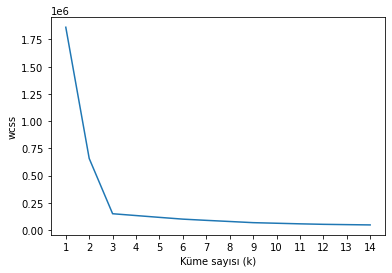

In [5]:
wcss=[]

for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

mp.figure()
mp.plot(range(1,15),wcss)
mp.xticks(range(1,15))
mp.xlabel("Küme sayısı (k)")
mp.ylabel("wcss")


Text(0.5, 1.0, '3-Ortalama Kümeleme Sonucu')

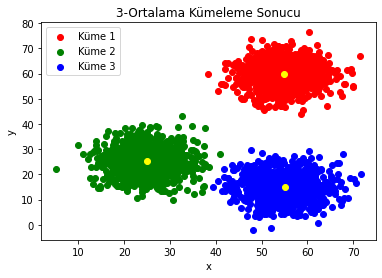

In [6]:
k_ort=KMeans(n_clusters=3)
kümeler=k_ort.fit_predict(data)
data["label"]=kümeler

mp.figure()
mp.scatter(data.x[data.label==0],data.y[data.label==0],color="red",label="Küme 1")
mp.scatter(data.x[data.label==1],data.y[data.label==1],color="green",label="Küme 2")
mp.scatter(data.x[data.label==2],data.y[data.label==2],color="blue",label="Küme 3")
mp.scatter(k_ort.cluster_centers_[:,0],k_ort.cluster_centers_[:,1],color="yellow")
mp.legend()
mp.xlabel("x")
mp.ylabel("y")
mp.title("3-Ortalama Kümeleme Sonucu")


In [13]:
data_hc=0
x1_hc=np.random.normal(25,5,20)
y1_hc=np.random.normal(25,5,20)

x2_hc=np.random.normal(55,5,20)
y2_hc=np.random.normal(60,5,20)

x3_hc=np.random.normal(55,5,20)
y3_hc=np.random.normal(15,5,20)

x_hc=np.concatenate((x1_hc,x2_hc,x3_hc),axis=0)
y_hc=np.concatenate((y1_hc,y2_hc,y3_hc),axis=0)

dictionary_hc={"x":x_hc,"y":y_hc}

data_hc=pd.DataFrame(dictionary_hc)
data_hc.head(5)

,x,y
0,40.159841,34.054826
1,25.022879,28.000826
2,29.432356,31.839601
3,24.119745,30.409588
4,25.253849,17.959020


Text(0, 0.5, 'Öklid Mesafesi')

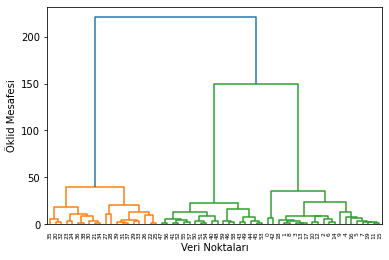

In [15]:
merg=linkage(data_hc,method="ward")
dendrogram(merg,leaf_rotation=90)
mp.xlabel("Veri Noktaları")
mp.ylabel("Öklid Mesafesi")

Text(0.5, 1.0, 'Hiyerarşik Bölütleme için Oluşturulan veri seti')

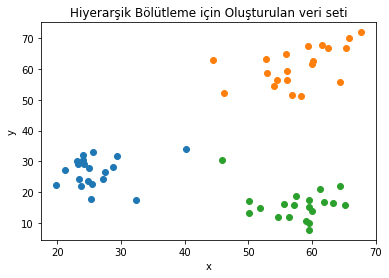

In [17]:
mp.figure()
mp.scatter(x1_hc,y1_hc)
mp.scatter(x2_hc,y2_hc)
mp.scatter(x3_hc,y3_hc)
mp.xlabel("x")
mp.ylabel("y")
mp.title("Hiyerarşik Bölütleme için Oluşturulan veri seti")

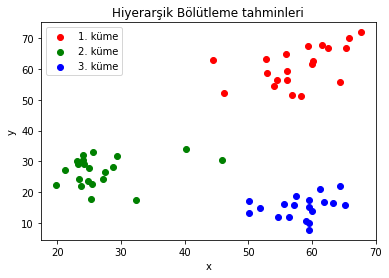

In [22]:
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
tahmin_hc=hc.fit_predict(data_hc)

data_hc["label"]=tahmin_hc

mp.figure()
mp.scatter(data_hc.x[data_hc.label==0],data_hc.y[data_hc.label==0],color="red",label="1. küme")
mp.scatter(data_hc.x[data_hc.label==1],data_hc.y[data_hc.label==1],color="green",label="2. küme")
mp.scatter(data_hc.x[data_hc.label==2],data_hc.y[data_hc.label==2],color="blue",label="3. küme")
mp.xlabel("x")
mp.ylabel("y")
mp.title("Hiyerarşik Bölütleme tahminleri")
mp.legend()

# Temel Bileşen Analizi  (PCA)


#Temel Bileşen Analizi veri setinin hangi düzlemde daha çok değiştiğini hesaplar

In [34]:
iris=load_iris()
data_iris=iris.data
feature_name=iris.feature_names
y=iris.target

data_iris=pd.DataFrame(data_iris,columns=feature_name)
data_iris["sınıf"]=y
data_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sınıf
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [38]:
pca=PCA(n_components=2,whiten=True)
pca.fit(data_iris)
x_pca=pca.transform(data_iris)
variance=pca.explained_variance_ratio_
toplam=sum(pca.explained_variance_ratio_)
print(f"Variance Ratio :{variance}")
print(f"Toplam :{toplam}")


Variance Ratio :[0.80595736 0.17288364]
Toplam :0.9788410054127343


array([[-1.30267202e+00,  5.89781394e-01],
       [-1.31477937e+00, -3.65828567e-01],
       [-1.38885204e+00, -3.47996394e-01],
       [-1.32759182e+00, -6.60021401e-01],
       [-1.32151012e+00,  5.89029629e-01],
       [-1.13193416e+00,  1.46068846e+00],
       [-1.35964487e+00, -2.45506721e-01],
       [-1.27780827e+00,  2.97092090e-01],
       [-1.38705372e+00, -1.18739290e+00],
       [-1.29733710e+00, -2.35139572e-01],
       [-1.22802471e+00,  1.25420558e+00],
       [-1.27178262e+00,  3.65102059e-03],
       [-1.34526628e+00, -4.89157472e-01],
       [-1.53038273e+00, -1.11641378e+00],
       [-1.28743056e+00,  2.26932618e+00],
       [-1.17743434e+00,  2.59202250e+00],
       [-1.27752003e+00,  1.53803126e+00],
       [-1.28737052e+00,  5.76057616e-01],
       [-1.09802674e+00,  1.74926937e+00],
       [-1.26193213e+00,  9.65624670e-01],
       [-1.14427370e+00,  8.06631419e-01],
       [-1.24297793e+00,  8.15599972e-01],
       [-1.52783762e+00,  1.18161704e-01],
       [-1.

Text(0, 0.5, 'p2')

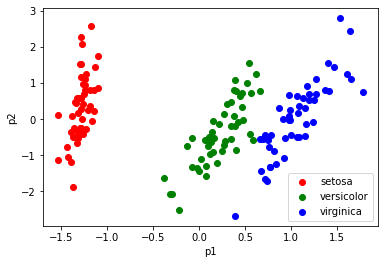

In [37]:
data_iris["p1"]=x_pca[:,0]
data_iris["p2"]=x_pca[:,1]
color=["red","green","blue"]

for i in range(3):
    mp.scatter(data_iris.p1[data_iris.sınıf==i],data_iris.p2[data_iris.sınıf==i],color=color[i],label=iris.target_names[i])

mp.legend()
mp.xlabel("p1")
mp.ylabel("p2")

#Kernel Pca Örneği

In [48]:
x_kernel,y_kernel=make_circles(n_samples=1_000,factor=0.3,noise=0.05,random_state=42)
x1,x2,y1,y2=train_test_split(x_kernel,y_kernel,stratify=y_kernel,random_state=42)

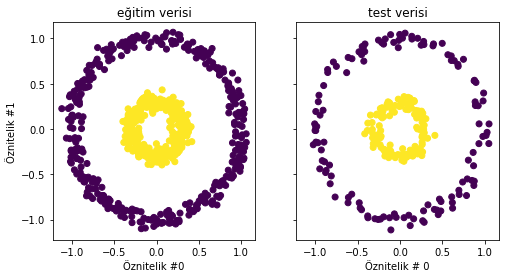

In [49]:
_,(train_ax,test_ax)=mp.subplots(ncols=2,sharex=True,sharey=True,figsize=(8,4))

train_ax.scatter(x1[:,0],x1[:,1],c=y1)
train_ax.set_ylabel("Öznitelik #1")
train_ax.set_xlabel("Öznitelik #0")
train_ax.set_title("eğitim verisi")


test_ax.scatter(x2[:,0],x2[:,1],c=y2)
test_ax.set_xlabel("Öznitelik # 0")
_=test_ax.set_title("test verisi")

In [52]:
pca_s=PCA(n_components=2)
pca_kernel=KernelPCA(n_components=None,kernel="rbf",gamma=10,fit_inverse_transform=True,alpha=0.1)

x_test_pca=pca_s.fit(x1).transform(x2)

x_test_pca_kernel=pca_kernel.fit(x1).transform(x2)

In [ ]:
fig(orig_data_ax,pca_proj_ax,kernel_pca_proj_ax)=mp.subplots(ncols=3,figsize=14,4)


orig_data_ax.scatter(x2[:,0],x2[:,1],c=y_test)
orig_data_ax.set_ylabel("Öznitelik #1")
orig_data_ax.set_xlabel("Öznitelik #0")
orig_data_ax.set_title("Test Verisi")